## Cálculo de trayectoria para nave exploratoria lunar

Por: Sandra Arce Mena & Angela María Cubillos Garay

Estrategia sugerida:

$\omega = 2.6617 \times 10^{-6}s^{-1} $

$G = 6.67 \times 10^{-11}Nm^{2}kg^{-2} $

$m_{T} = 5.9736 \times 10^{24}kg $

$r_{T} = 6.3781 \times 10^{6}m $

$m_{L} = 0.07349 \times 10^{24}kg $

$r_{L} = 1.7374 \times 10^{6}m $

$d = 3.844 \times 10^{8}m $


In [4]:
pip install numba==0.48

  Using cached https://files.pythonhosted.org/packages/f5/ca/9e47464d388c3372454639d1739fa21605862c8815d53279e1216b5694e1/numba-0.48.0-cp37-cp37m-win_amd64.whl
  Using cached https://files.pythonhosted.org/packages/1d/83/cd2843726a6316e372822e9e42cd0083b6d1d98d89d53880e7e67d5eec68/llvmlite-0.31.0-cp37-cp37m-win_amd64.whl
  Found existing installation: llvmlite 0.29.0
Note: you may need to restart the kernel to use updated packages.


ERROR: Cannot uninstall 'llvmlite'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [29]:
%matplotlib notebook 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as anim
from numba import jit
from tqdm import tqdm 
import time

In [30]:
w = 2.6617e-6

G = 6.67e-11

m_T = 5.9736e24

r_T = 6.3781e6

m_L = 0.07349e24

r_L = 1.7374e6

d = 3.844e8

In [31]:
def r_2 (r, phi, orbital_perigee, t):
    return np.sqrt(1+r**2-2*r*np.cos(phi-w*t))

def First_equation(pr):
    return pr 

def Second_equation(r, pf):
    return pf/((r**2)+1e-9)

def Third_equation(r, phi, pr, pf, t):
    return ((pf**2/r**3)-orbital_perigee*((1/r**2)+((mu/((r_2(r,phi,orbital_perigee,t)+1e-9)**3))*(r-np.cos(phi-w*t)))))

def Fourth_equation(r, phi, pr, pf, t):
    return -((triangle*mu*r)/(((r_2(r, phi, orbital_perigee,t))+1e-9)**3))*np.sin(phi-w*t)


In [32]:
orbital_perigee = float(25)/float(180)*np.pi
triangle = G*m_T/(d**3)

mu = m_L/m_T

v_initial= float(11100)
r_initial = r_T/d
phi_initial = float(0)
pr_initial = (v_initial/d)*np.cos(orbital_perigee-phi_initial)
pf_initial = r_initial*(v_initial/d)*np.sin(orbital_perigee-phi_initial)

c_vector_initial = [r_initial, phi_initial, pr_initial, pf_initial]

In [33]:
def Solution_RK4(c_initial, t_initial, t_final, h = 10):
    
    N = int((t_final - t_initial)/h) + 1
    t = np.linspace(t_initial, t_final, N)
    
    r = np.zeros([N])
    pr = np.zeros([N])
    pf = np.zeros([N])
    phi = np.zeros([N])
    
    r[0] = c_initial[0]
    pr[0] = c_initial[2]
    pf[0] = c_initial[3]
    phi[0] = c_initial[1]
    
    Ki = np.zeros(4)
    Kj = np.zeros(4)
    Kk = np.zeros(4)
    Kl = np.zeros(4)
    
    for i in tqdm(range(1, N)):
        
        n = 0.5
        
        Ki[0] = h*First_equation(pr[i-1])
        Kj[0] = h*First_equation(pr[i-1]+n*Ki[2])
        Kk[0] = h*First_equation(pr[i-1]+n*Kj[2])
        Kl[0] = h*First_equation(pr[i-1]+Kk[2])
        
        Ki[1] = h*Second_equation(r[i-1],pf[i-1])
        Kj[1] = h*Second_equation(r[i-1]+n*Ki[0], pf[i-1]+n*Ki[3])
        Kk[1] = h*Second_equation(r[i-1]+n*Kj[0], pf[i-1]+n*Kj[3])
        Kl[1] = h*Second_equation(r[i-1]+Kk[0], pf[i-1]+Kk[3])
        
        Ki[2] = h*Third_equation(r[i-1], phi[i-1], pr[i-1], pf[i-1], t[i-1])
        Kj[2] = h*Third_equation(r[i-1]+n*Ki[0], phi[i-1]+n*Ki[1], pr[i-1]+n*Ki[2], pf[i-1]+n*Ki[3], t[i-1]+n*h)
        Kk[2] = h*Third_equation(r[i-1]+n*Kj[0], phi[i-1]+n*Kj[1], pr[i-1]+n*Kj[2], pf[i-1]+n*Kj[3], t[i-1]+n*h)
        Kl[2] = h*Third_equation(r[i-1]+Kk[0], phi[i-1]+Kk[1], pr[i-1]+Kk[2], pf[i-1]+Kk[3], t[i-1]+h)
        
        
        Ki[3] = h*Fourth_equation(r[i-1], phi[i-1], pr[i-1], pf[i-1], t[i-1])
        Kj[3] = h*Fourth_equation(r[i-1]+n*Ki[0], phi[i-1]+n*Ki[1], pr[i-1]+n*Ki[2], pf[i-1]+n*Ki[3], t[i-1]+n*h)
        Kk[3] = h*Fourth_equation(r[i-1]+n*Kj[0], phi[i-1]+n*Kj[1], pr[i-1]+n*Kj[2], pf[i-1]+n*Kj[3], t[i-1]+n*h)
        Kl[3] = h*Fourth_equation(r[i-1]+Kk[0], phi[i-1]+Kk[1], pr[i-1]+Kk[2], pf[i-1]+Kk[3], t[i-1]+h)
        
        s = float(6)
        
        r[i]= r[i-1]+(Ki[0]+2*Kj[0]+2*Kk[0]+Kl[0])/s
        pr[i]= pr[i-1]+(Ki[2]+2*Kj[2]+2*Kk[2]+Kl[2])/s
        pf[i]= pf[i-1]+(Ki[3]+2*Kj[3]+2*Kk[3]+Kl[3])/s
        phi[i]= phi[i-1]+(Ki[1]+2*Kj[1]+2*Kk[1]+Kl[1])/s
    
    return t, r, phi

In [34]:
t, r, phi = Solution_RK4(c_vector_initial, 0, 7e5)

100%|██████████| 70000/70000 [00:12<00:00, 5595.23it/s] 


In [35]:
t_f = []
r_f = []
phi_f = []

for j in range(len(t)):
    
    if j % 1000 == 0:
        t_f.append(t[j])
        r_f.append(r[j])
        phi_f.append(phi[j])

In [36]:
tt = np.array(t_f)
rr = np.array(r_f)
phip = np.array(phi_f)

<IPython.core.display.Javascript object>


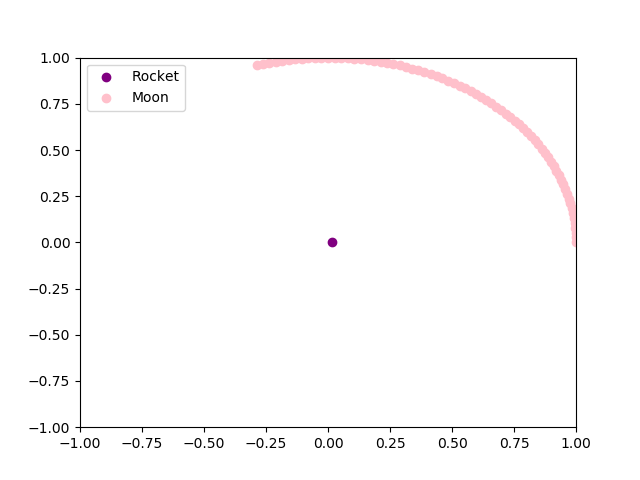

(-1, 1)

In [38]:
coordinate_x = rr*np.cos(phip)
coordinate_y = rr*np.sin(phip)
Moon_x = np.cos(w*tt)
Moon_y = np.sin(w*tt)
plt.scatter(coordinate_x, coordinate_y, color="purple", label = "Rocket")
plt.scatter(Moon_x,Moon_y, c="pink", label ="Moon")
plt.legend()
plt.xlim(-1,1)
plt.ylim(-1,1)

<IPython.core.display.Javascript object>


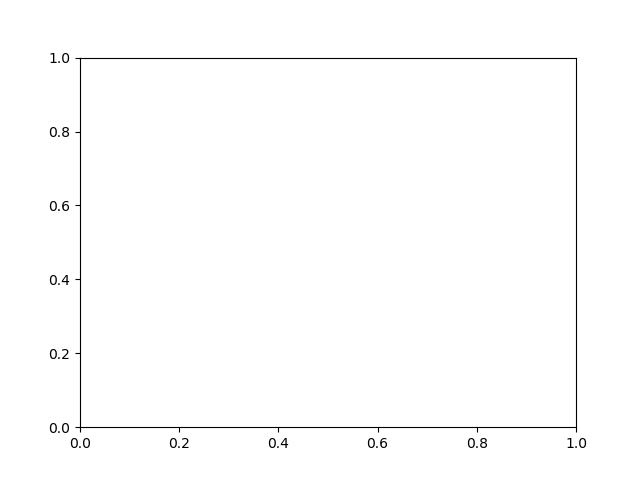

In [39]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

def init():
    ax.set_xlim([-1.,1.])
    ax.set_ylim([-1.,1.])
    
def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title("Time = %.2f days" %(t[i]/3600./24.))
    Earth = plt.Circle((0,0), r_T/d, color="Purple", label= "Earth")
    Moon = plt.Circle(([i], Moon_y[i]), r_L/d, color= "Pink", label= "Moon")
    
    plot = ax.add_patch(Earth)
    plot = ax.add_patch(Moon)
    
    plot = ax.scatter(coordinate_x[i],coordinate_y[i], s=1, c="Red", label= "Rocket")
    plot =plt.legend()
    
    return plot
   

In [ ]:
Animation= anim.FuncAnimation(fig, Update, frames=len(t), init_func=init)

Writer = anim.writers['ffmpeg']
writer_ = Writer(fps=10, metadata=dict(artist='Me'))
Animation.save('LunarRocket.mp4', writer=writer_)